# Plot DA simulation

In [17]:
%cd Experiment-Simulation

[Errno 2] No such file or directory: 'Experiment-Simulation'
/home/jofrony/Documents/Repositories/Neuromodulation-software/local/replay/Experiment-Simulation


In [18]:
%matplotlib notebook
from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces
import snudda.neuromodulation.modulation as s
import json
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


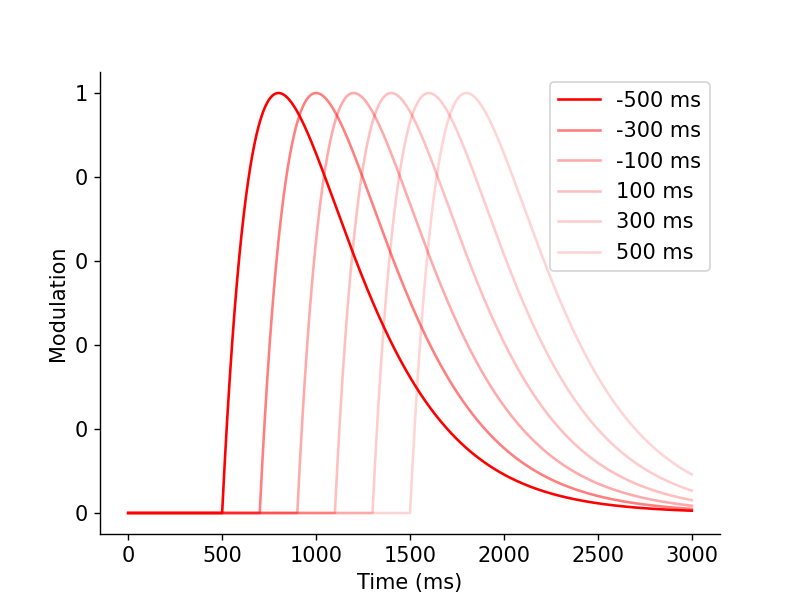

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


In [19]:
%matplotlib notebook
DA1 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay1.json','r'))
DA3 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay3.json','r'))
DA5 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay5.json','r'))
DA7 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay7.json','r'))
DA9 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay9.json','r'))
DA11 = json.load(open('../../../parameters/modulation/dopamine_alpha_delay11.json','r'))
legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}

transient = [DA1,DA3,DA5,DA7,DA9,DA11]

colours={'DA' : 'red', 'ACh' : 'blue'}
labels = ['DA', 'DA-AChB','DA-AChP', 'AChB','AChP']
fig = plt.figure()
ax = fig.subplots()
for i,k in enumerate(transient):
    k = k['description']
    for name, info in k.items(): 
        start = info['parameters']['tstart'] - 1000
        method = getattr(s,info['method'])
        time = np.arange(0,info['duration'],0.5)
        info['parameters'].update({'time_step_array' : time})
        ts = method(info['parameters'])
        time = np.arange(0,info['duration'],0.5)
        ax.plot(time,ts,color=colours[name],label= str(start) + ' ms',alpha=1/(i+1))
        ax.set_ylabel('Modulation',fontdict=legend_font)
        ax.set_xlabel('Time (ms)',fontdict=legend_font)
        plt.legend(prop=legend_font)
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ylocs, labels = plt.yticks()
        xlocs, labels = plt.xticks()
        ylocs = [int(k) for k in ylocs]
        xlocs = [int(k) for k in xlocs]
        ax.set_xticklabels(labels=xlocs,fontdict=legend_font)
        ax.set_yticklabels(ylocs,fontdict=legend_font)

        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        plt.show()
plt.savefig('Delay/Delays.svg',dpi=300)

In [20]:
root = 'Dopamine-delays-network/'
simroot = root + 'simulation/'
fn = [simroot + 'network-voltage-Dopamine-control-network.csv',\
      simroot + 'network-voltage-Dopamine-delays1-network.csv',\
     simroot + 'network-voltage-Dopamine-delays3-network.csv',\
      simroot + 'network-voltage-Dopamine-delays5-network.csv',\
     simroot + 'network-voltage-Dopamine-delays8-network.csv',\
     simroot + 'network-voltage-Dopamine-delays9-network.csv',\
      simroot + 'network-voltage-Dopamine-delays11-network.csv']




root = 'Dopamine-delays-network/'
nf = [root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5']





nl = comparePlotTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control','Delay1', 'Delay3', 'Delay5','Delay8','Delay9','Delay11'],colours=['red','purple','blue','pink','green','maroon','black'],save_dir='Compare-network/')

Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions


In [21]:
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['control','Delay1', 'Delay3','Delay5', 'Delay8','Delay9','Delay11'],colours=['red','purple','blue','pink','green','maroon','black'])


Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions


<IPython.core.display.Javascript object>


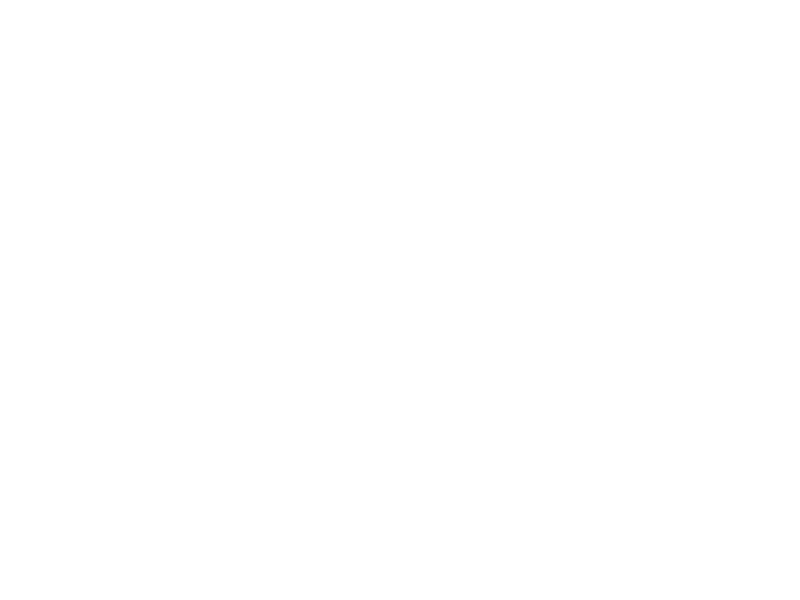

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-11-dSPN-colour.svg


In [22]:
%matplotlib notebook
plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 1

nl.plotTraceNeuronType(neuronType="dSPN", nTraces=30, offset=plot_offset, skipTime=skip_time)


<IPython.core.display.Javascript object>


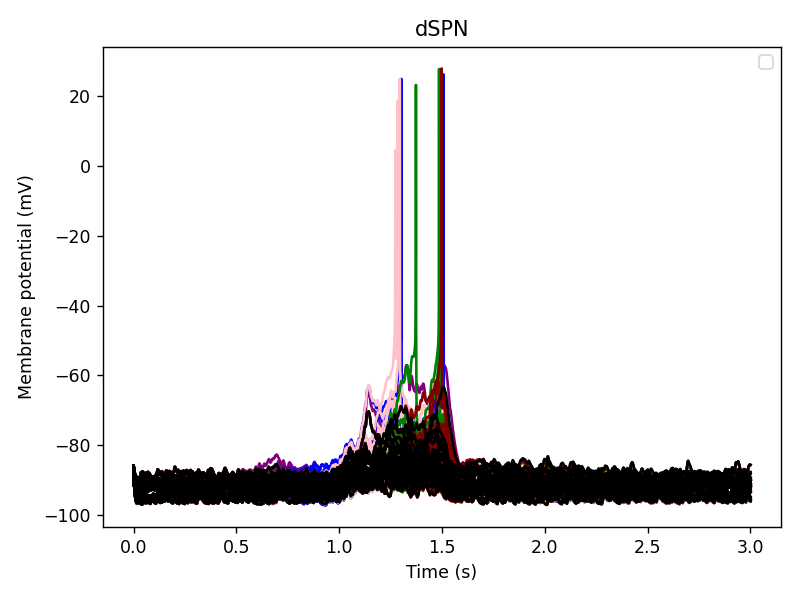

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-11-dSPN-colour.svg


In [23]:
%matplotlib notebook
plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

nl.plotTraceNeuronType(neuronType="dSPN", nTraces=30, offset=plot_offset, skipTime=skip_time)

In [24]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

def firing_frequency(obj_loaded_traces,type_cell='dSPN'):

    data = obj_loaded_traces.get_traces(neuronType=type_cell)
    data_spikes = dict()
    data_average = dict()
    for ctr, network in data.items():
        data_spikes.update({ctr : dict()})
        data_average.update({ctr : dict()})
        for k, volt in network.items():
            neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
            spike = elp.spike_train_generation.threshold_detection(neov)
            data_spikes[ctr].update({k : spike})
            
            if len(spike) >0:
                print(max(volt[4000:5000]))
                av = elp.statistics.mean_firing_rate(spike,t_start=1 * pq.s, t_stop= 1.5 *pq.s)
                
                data_average[ctr].update({k : av})
            
    return data_spikes, data_average

In [25]:
def plot_mean_frequency(data_average,labels_v=['V0', 'V1'],exp_title=None):
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    fig, ax = plt.subplots()
    pos = 0
    for k, average in data_average.items():
        ax.bar([pos], [np.array([*average.values()]).mean()],yerr=[np.array([*average.values()]).std()], align='center', alpha=(1/(k+1)), capsize=10,color='red')
        #ax.scatter(np.random.rand(len([*average.values()]))*0.01 -0.005 + pos ,[*average.values()])
        pos=pos+1
        
    ax.set_ylabel('Mean frequency (Hz)',fontdict=legend_font)
    ax.set_title('Mean frequency (Hz)',fontdict=legend_font)
    ax.set_xticks([*data_average.keys()])
    ax.set_xlim([-0.5,7])
    ax.set_xticklabels(labels_v,fontdict=legend_font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ylocs, labels = plt.yticks()

    ax.set_yticklabels(labels=ylocs,fontdict=legend_font)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig('Delay/'+exp_title+'_mean_freuquency.svg',dpi=300)
    plt.show()

-0.08705700000000001
-0.08812160000000001
-0.08699899999999999
-0.0924079
-0.0880219
-0.08684220000000001
-0.087741
-0.08861150000000001
-0.08676500000000001


<IPython.core.display.Javascript object>


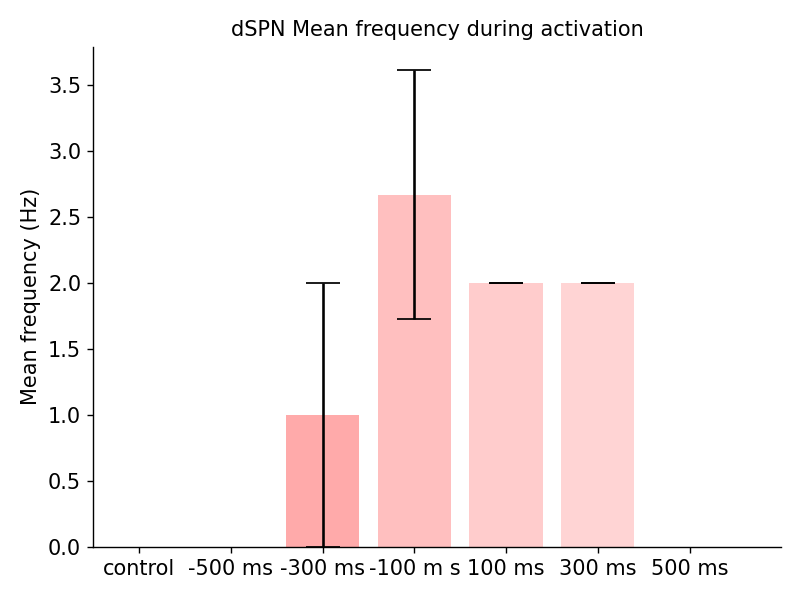

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.

In [26]:
spikes_dSPN, average_dSPN = firing_frequency(kl,type_cell='dSPN')
plot_mean_frequency(average_dSPN,labels_v=['control','-500 ms', '-300 ms','-100 m s','100 ms','300 ms','500 ms'],exp_title='dSPN Mean frequency during activation')

In [27]:
def percentage_spike(obj_loaded_traces,type_cell='dSPN',total=None):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        
        for t, voltages in data.items():
            if max(voltages)<0:
                depol=depol+1
            else:
                spike=spike+1
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'percentage': spike/total*100}})
        
    return ratio

per_dSPN = percentage_spike(kl,type_cell='dSPN',total=30)

In [28]:
def plot_percentage(percentages,chosen=[3,4],labels_v=['control','DA'],c=['black','red'],exp_title='dSPN'):
    
    legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 12}
    fig, ax = plt.subplots()
    pos = 3
    for k, per in percentages.items():
        if k in chosen:
            ax.bar([k], [per['percentage']],alpha=(1/(k+1)),align='center', ecolor='black', capsize=10,width=0.4,color='red')
            
    ax.set_ylabel('Percentage spiking neurons (total) %',fontdict=legend_font)
    ax.set_title('Ratio spike/pol',fontdict=legend_font)
    ax.set_xticks(range(len(chosen)))
    ax.set_xticklabels(labels_v,fontdict=legend_font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
        
    ylocs, labels = plt.yticks()

    ax.set_yticklabels(labels=ylocs,fontdict=legend_font)



    plt.tight_layout()
    plt.title(exp_title,fontdict=legend_font)
    plt.savefig('Delay/'+exp_title+'_precentage.svg',dpi=300)
    plt.show()

<IPython.core.display.Javascript object>


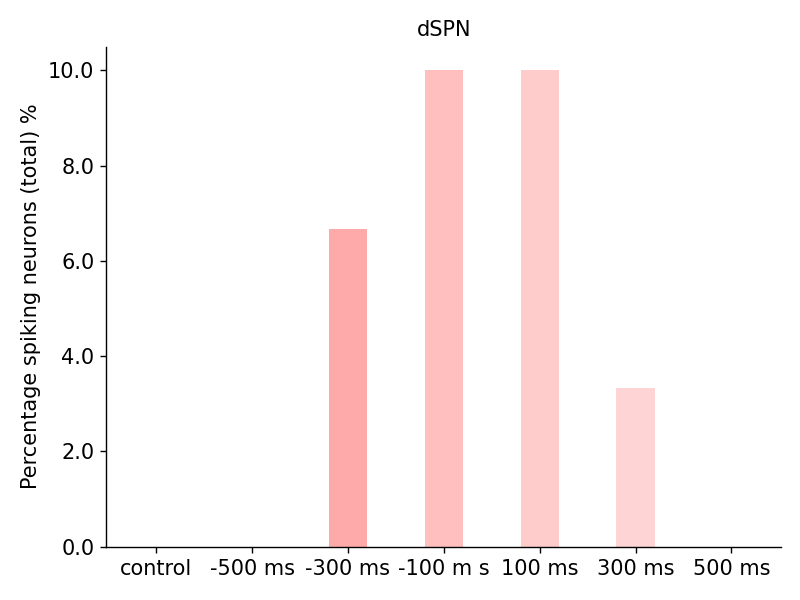

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


In [29]:
plot_percentage(per_dSPN,exp_title='dSPN',labels_v=['control','-500 ms', '-300 ms','-100 m s','100 ms','300 ms','500 ms'],chosen=[0,1,2,3,4,5,6],c=['red','purple','blue','pink','green','maroon','black'])